In [116]:
%reload_ext lab_black

In [117]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In [118]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from pprint import pprint

In [119]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [120]:
# Reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [121]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [122]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [123]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results

* Calculate the date 1 year ago from the last data point in the database

* Perform a query to retrieve the data and precipitation scores

* Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [124]:
inspector = inspect(engine)
table_names = inspector.get_table_names()
for table in table_names:
    print(table + ":")
    columns = inspector.get_columns(table)
    column_names = [colunm["name"] for colunm in columns]
    print(column_names)

measurement:
['id', 'station', 'date', 'prcp', 'tobs']
station:
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [125]:
# Calculate the max date value from the dataset
max_date = session.query(func.max(Measurement.date)).first()
print(max_date[0])
# Calculate the date an year ago from the max_date
min_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(min_date)

2017-08-23
2016-08-23


In [126]:
# Query to retrieve the last 12 months of precipitation data
cmd = (
    session.query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date >= min_date)
    .order_by(Measurement.date)
)
pprint(cmd.first())

('2016-08-23', 0.0)


In [127]:
# Store the result in a variable
result = cmd.all()

In [128]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precipitation = pd.DataFrame(result, columns=["Date", "Precipitation"])
df_precipitation.set_index(["Date"], inplace=True)

In [129]:
# Sort the dataframe by dates
df_precipitation = df_precipitation.sort_values(by=["Date"], ascending=True)
df_precipitation.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


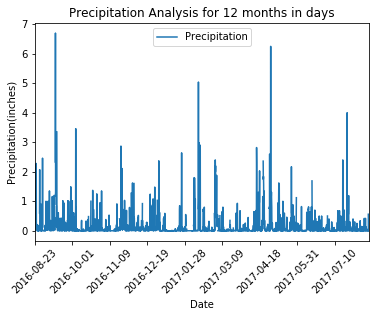

In [130]:
# Plot the dataframe as a horizontal bar chart and save the figure as Precipitation.png
df_precipitation.plot(title="Precipitation Analysis for 12 months in days")
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.legend(loc="upper center")
plt.xticks(rotation=45)
plt.savefig("Images/Precipitation.png")
plt.show()

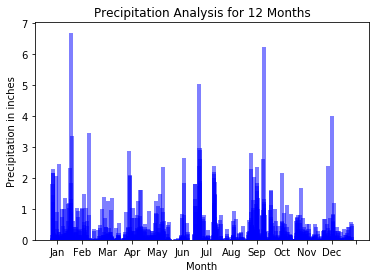

In [131]:
# Define labels
plt.title("Precipitation Analysis for 12 Months")
plt.xlabel("Month")
plt.ylabel("Precipitation in inches")

# Define months for x-ticks labels
months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

# Define X and Y values
y = df_precipitation["Precipitation"].tolist()
x = np.arange(0, len(df_precipitation.index.tolist()), 1)
# Define X-tick labels (months) and their positioning
month_total = len(y)
month_step_xticks = int(month_total / 12)
plt.ylim = max(y) + 1
tick_locations = [x + 55 for x in range(1, month_total, month_step_xticks)]
# Define plot
plt.bar(x, y, width=30, color="blue", alpha=0.5, align="edge")
plt.xticks(tick_locations, months)
plt.show()

In [132]:
x

array([   0,    1,    2, ..., 2227, 2228, 2229])

In [133]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#### The above data is for precipitation from each weather station for each date.The graph below shoes the average amount of the rain for each date from all the weather stations. 

![describe](Images/describe.png)

In [134]:
# Design a query to show how many stations are available in this dataset?

# Output using Station table
stations_count = session.query(Station).count()
print("There are total {} stations.".format(stations_count))

There are total 9 stations.


In [135]:
# Output using the measurement table
stations_count = session.query(Measurement).group_by(Measurement.station).count()
print("There are total {} stations.".format(stations_count))

There are total 9 stations.


In [136]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

print("The most active stations is: ", active_stations[0][0])

The most active stations is:  USC00519281


In [137]:
active_stations_list = [st for st, count in active_stations]
# active_stations_list
for st, count in active_stations:
    print("List of most active Stations is:", st, " with", count, "observation")

List of most active Stations is: USC00519281  with 2772 observation
List of most active Stations is: USC00519397  with 2724 observation
List of most active Stations is: USC00513117  with 2709 observation
List of most active Stations is: USC00519523  with 2669 observation
List of most active Stations is: USC00516128  with 2612 observation
List of most active Stations is: USC00514830  with 2202 observation
List of most active Stations is: USC00511918  with 1979 observation
List of most active Stations is: USC00517948  with 1372 observation
List of most active Stations is: USC00518838  with 511 observation


In [138]:
new_list = [(st, count) for st, count in active_stations]
print("List of most active Stations is:", new_list)

List of most active Stations is: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [139]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [140]:
active_stations_list

['USC00519281',
 'USC00519397',
 'USC00513117',
 'USC00519523',
 'USC00516128',
 'USC00514830',
 'USC00511918',
 'USC00517948',
 'USC00518838']

In [188]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station?

cmd = session.query(
    Measurement.station,
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs),
).filter(Measurement.station == active_stations[0][0])
temp = cmd.all()
station_id_max_temp = temp[0][2]

In [142]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station?

In [184]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# cmd = session.query(func.max(Measurement.tobs)).filter(
#     Measurement.station == active_stations[0][0]
# )
# station_id_max_temp_list = cmd.all()
# station_id_max_temp = station_id_max_temp_list[0][0]
# station_id_max_temp

cmd = (
    session.query(Measurement.date, Measurement.station, Measurement.tobs)
    .filter(Measurement.date > min_date)
    .filter(Measurement.station == active_stations[0][0])  # station_id_max_temp)
)
result = cmd.all()
station_id_max_temp

85.0

In [201]:
df = pd.DataFrame(result, columns=["Date", "Station ID", "Temperature_Recorded"])
df["Date"]
df = df.sort_values(by=["Date"], ascending=False)
df.head()

,Date,Station ID,Temperature_Recorded
350,2017-08-18,USC00519281,79.0
349,2017-08-17,USC00519281,76.0
348,2017-08-16,USC00519281,76.0
347,2017-08-15,USC00519281,77.0
346,2017-08-14,USC00519281,77.0


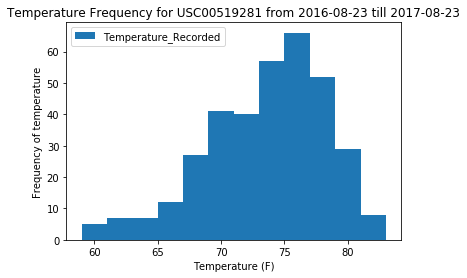

In [205]:
df.plot.hist(
    by="Temperature_Recorded",
    bins=12,
    title=f"Temperature Frequency for {active_stations[0][0]} from {min_date} till {max_date[0]}",
)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency of temperature")
plt.legend()
plt.savefig("Images/Temperature_Analysis.png")
plt.show()

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d'
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

    return (
        session.query(
            func.min(Measurement.tobs),
            func.avg(Measurement.tobs),
            func.max(Measurement.tobs),
        )
        .filter(Measurement.date >= start_date)
        .filter(Measurement.date <= end_date)
        .all()
    )


# function usage example
print(calc_temps("2012-02-28", "2012-03-05"))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax
# for your trip using the previous year's data for those same dates.

In [30]:
# Plot the results from your previous query as a bar chart.
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)


def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """

    sel = [
        func.min(Measurement.tobs),
        func.avg(Measurement.tobs),
        func.max(Measurement.tobs),
    ]
    return (
        session.query(*sel)
        .filter(func.strftime("%m-%d", Measurement.date) == date)
        .all()
    )


daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [35]:
# Plot the daily normals as an area plot with `stacked=False`